In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [0]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Hitter.csv to Hitter.csv


In [0]:
df=pd.read_csv("./Hitter.csv")
df=df.dropna() #eksik değerler siliniyor
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']]) #kategorik değişkenler dummy e çevrildi.One hot encoding yaklaşımı yapılmış oluyor.
y=df["Salary"]  #bağımlı değişken
X_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X=pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1) #oluşturulan dummyler ve bir önceki veri seti bir araya getirilerek bağımsız değişkenlerin nihai hali elde edildi.
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42) #veri seti 25e 75 ayrılmış oldu. test train

In [0]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

**Model&Tahmin**

In [0]:
cart_model= DecisionTreeRegressor(max_leaf_nodes=10) #normalde çok dallanmanın olduğu görülür. bunun yerine yaprak sayısını az yapmak için max_leaf_nodes=3 eklenir.

In [16]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

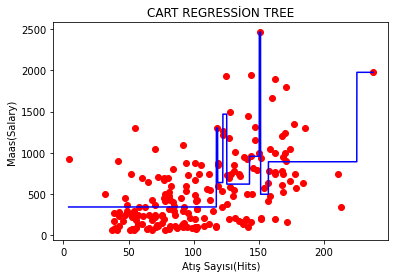

In [17]:
X_grid=np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid=X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color='red')

plt.plot(X_grid, cart_model.predict(X_grid), color='blue')

plt.title('CART REGRESSİON TREE')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maas(Salary)');

#grafikte ne kdar fazla bölme işlemi yapılırsa o kadar yakın tahminler edilecektir mantıken

*Tek Değişkenli Tahmin*

In [18]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [19]:
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

*Tüm Değişkenler*

In [33]:
from google.colab import files

uploaded = files.upload()

Saving Hitter.csv to Hitter (2).csv


In [0]:
df=pd.read_csv("./Hitter.csv")
df=df.dropna() #eksik değerler siliniyor
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']]) #kategorik değişkenler dummy e çevrildi.One hot encoding yaklaşımı yapılmış oluyor.
y=df["Salary"]  #bağımlı değişken
X_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X=pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1) #oluşturulan dummyler ve bir önceki veri seti bir araya getirilerek bağımsız değişkenlerin nihai hali elde edildi.
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42) #veri seti 25e 75 ayrılmış oldu. test train

In [0]:
cart_model= DecisionTreeRegressor().fit(X_train, y_train)

In [36]:
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))  #değerin düşmüş olması değişken sayısı arttıkça hatanın daha düşük old anlamına gelir.

478.33695251586687

**Model Tuning**

In [0]:
cart_params={"max_depth":[2,3,4,5,10,20],
             "min_samples_split":[2,10,5,50,10]}

In [0]:
cart_model=DecisionTreeRegressor()

In [0]:
cart_cv_model=GridSearchCV(cart_model, cart_params, cv=10).fit(X_train, y_train)

In [40]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [0]:
#final model
cart_tuned=DecisionTreeRegressor(max_depth=4, min_samples_split=50).fit(X_train, y_train)

In [42]:
y_pred=cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434